In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
df['y'] = data['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
samples = df.size
features = len(data['feature_names'])
print('number of samples:',samples, 'number of features:',features)

number of samples: 2492 number of features: 13


In [7]:
df['y'].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [8]:
columns = data['feature_names']
mean = []
median = []
std = []
for i in columns:
    mean.append(df[i].mean())
    median.append(df[i].median())
    std.append(df[i].std())
total_data = {'mean':mean,'median':median,'std':std}
results = pd.DataFrame(total_data,index=columns)
results

,mean,median,std
alcohol,13.000618,13.050,0.811827
malic_acid,2.336348,1.865,1.117146
ash,2.366517,2.360,0.274344
alcalinity_of_ash,19.494944,19.500,3.339564
magnesium,99.741573,98.000,14.282484
total_phenols,2.295112,2.355,0.625851
flavanoids,2.029270,2.135,0.998859
nonflavanoid_phenols,0.361854,0.340,0.124453
proanthocyanins,1.590899,1.555,0.572359
color_intensity,5.058090,4.690,2.318286


<AxesSubplot:>

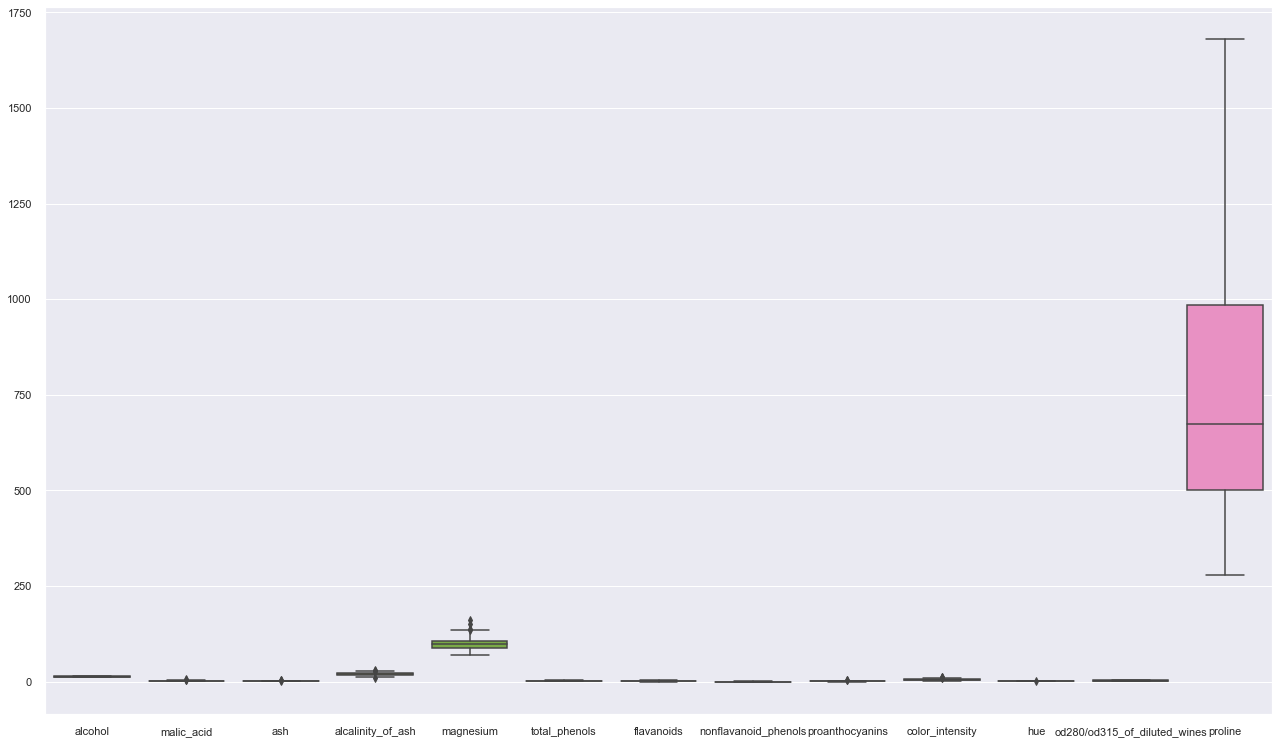

In [9]:
sns.set(rc={'figure.figsize':(22,13)})
sns.boxplot(data=df.drop('y',axis=1))

<AxesSubplot:ylabel='Count'>

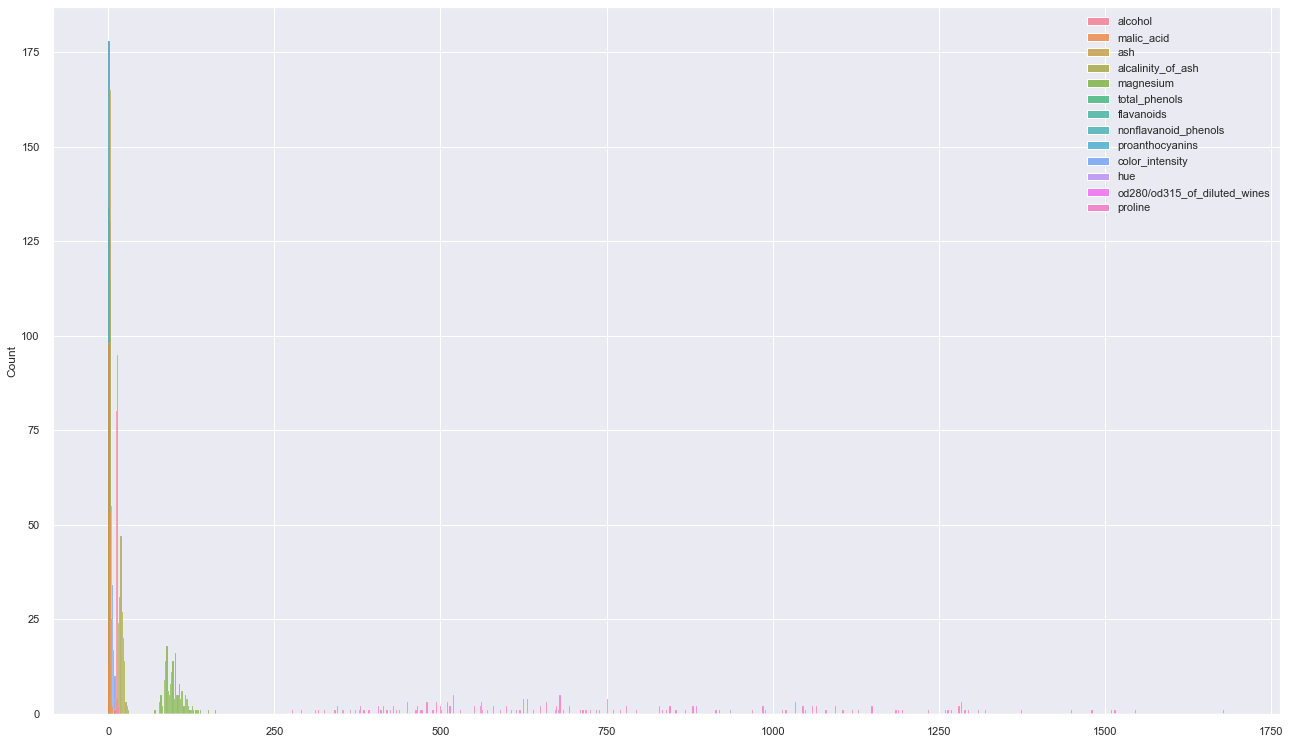

In [10]:
sns.histplot(data=df.drop('y',axis=1))

od280/od315_of_diluted_wines  ash                             0.003911
ash                           od280/od315_of_diluted_wines    0.003911
proanthocyanins               ash                             0.009652
ash                           proanthocyanins                 0.009652
alcalinity_of_ash             color_intensity                 0.018732
color_intensity               alcalinity_of_ash               0.018732
proanthocyanins               color_intensity                 0.025250
color_intensity               proanthocyanins                 0.025250
malic_acid                    magnesium                       0.054575
magnesium                     malic_acid                      0.054575
total_phenols                 color_intensity                 0.055136
color_intensity               total_phenols                   0.055136
magnesium                     hue                             0.055398
hue                           magnesium                       0.055398
magnes

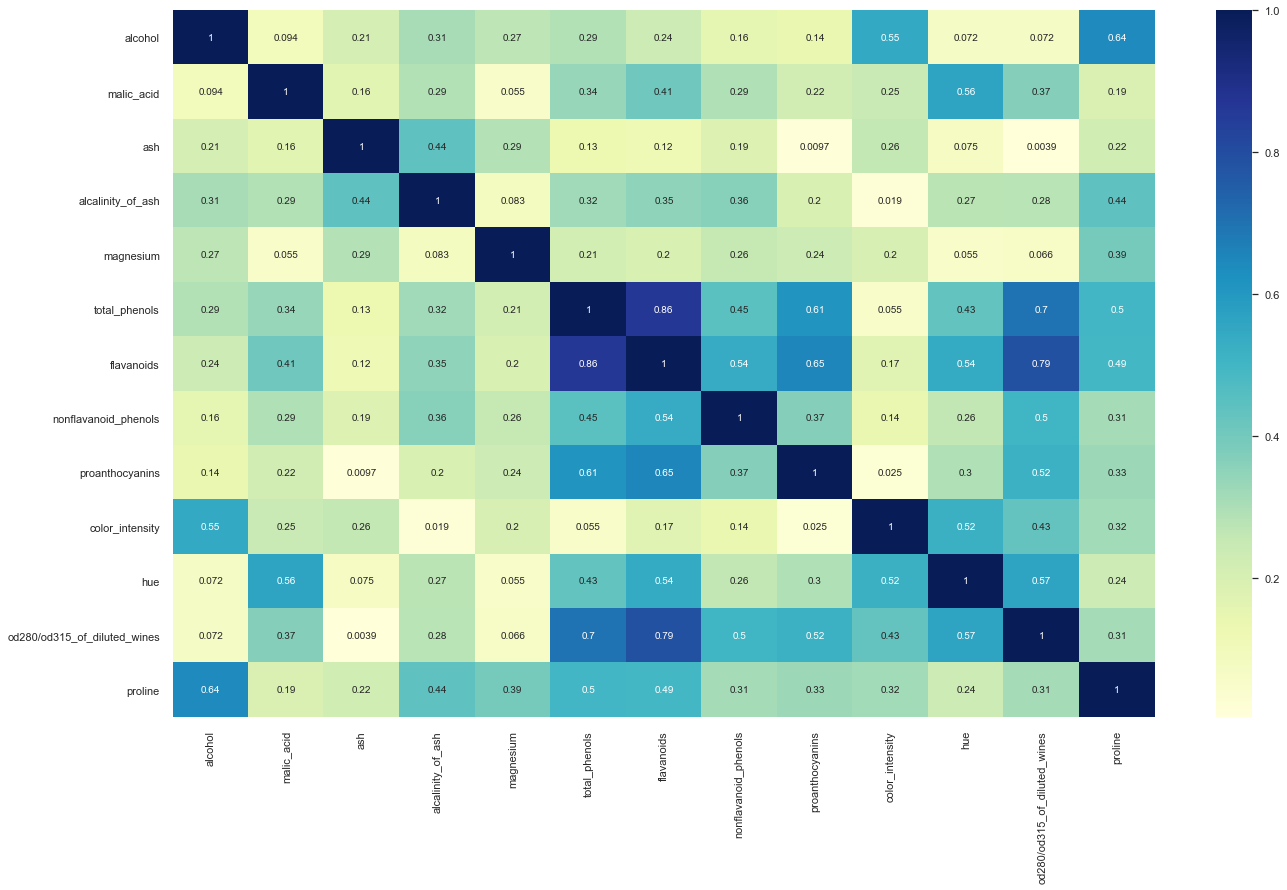

In [11]:
pd.set_option('display.max_rows',200)
cols = df.drop('y',axis=1).columns
corr = df[cols].corr().abs()
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so)
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True , annot_kws={'size': 10})


In [13]:

sc = StandardScaler()
data_frame = sc.fit_transform(df.drop('y',axis=1))
data_frame = pd.DataFrame(data_frame,columns=df.drop('y',axis=1).columns)
data_frame['y'] = df['y']
data_frame

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_frame.drop('y',axis=1))
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

Text(0, 0.5, 'Second Principle Component')

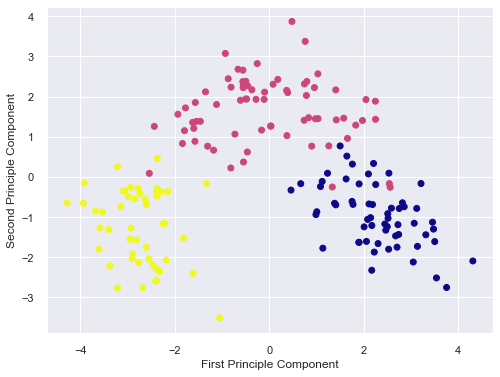

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=data_frame['y'],cmap='plasma')
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [15]:
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_frame.drop('y',axis=1))
pca_3.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

## Clustering

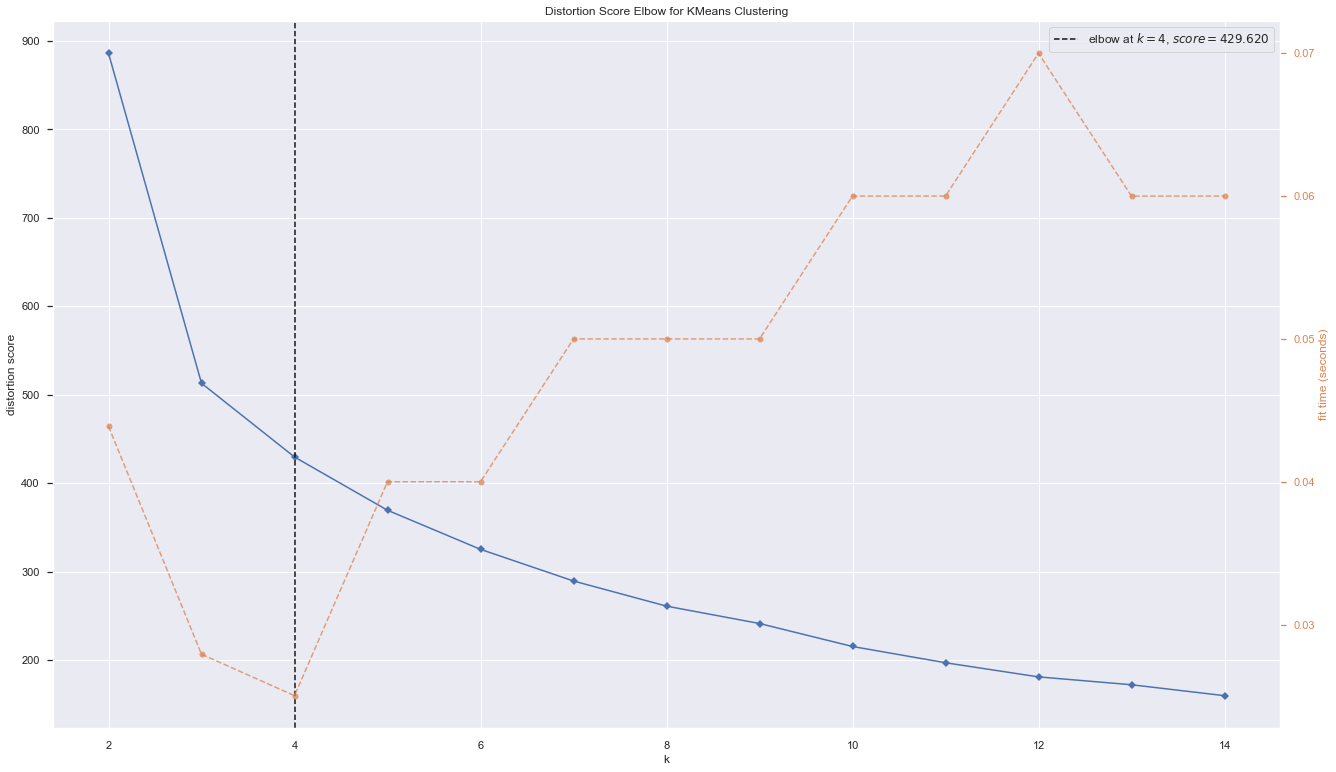

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
k_model = KMeans()
visual = KElbowVisualizer(k_model, k=(2,15), timings= True)
visual.fit(data_pca_3)
visual.show()

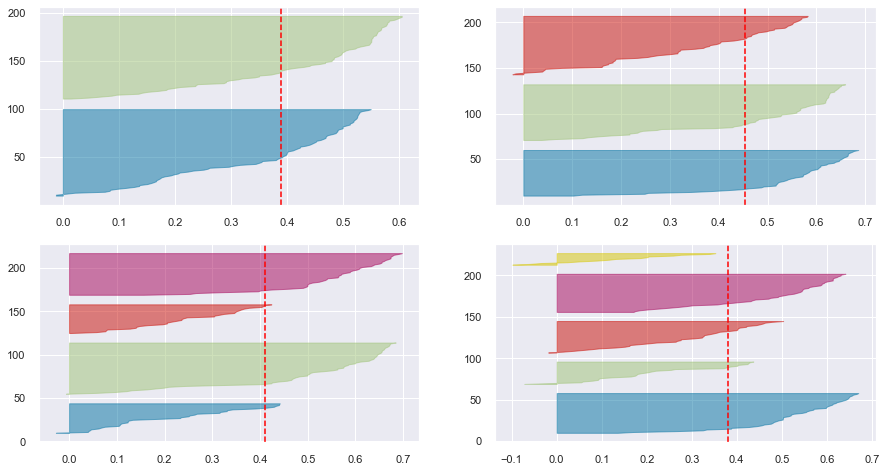

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_pca_3)

Text(0, 0.5, 'Second Principle Component')

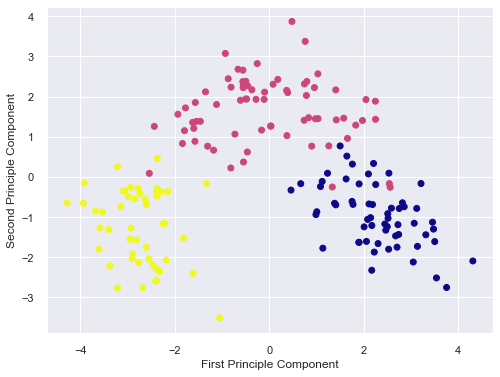

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca_3[:,0],data_pca_3[:,1],c=data_frame['y'],cmap='plasma')
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")

In [28]:
pd.concat([df,pd.DataFrame(data_pca_3,columns=['pc1','pc2','pc3'])])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y,pc1,pc2,pc3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,NaN,NaN,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,NaN,NaN,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,NaN,NaN,NaN
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,NaN,NaN,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.370524,-2.216289,-0.342570
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.601956,-1.757229,0.207581
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.677839,-2.760899,-0.940942
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.387017,-2.297347,-0.550696


<AxesSubplot:>

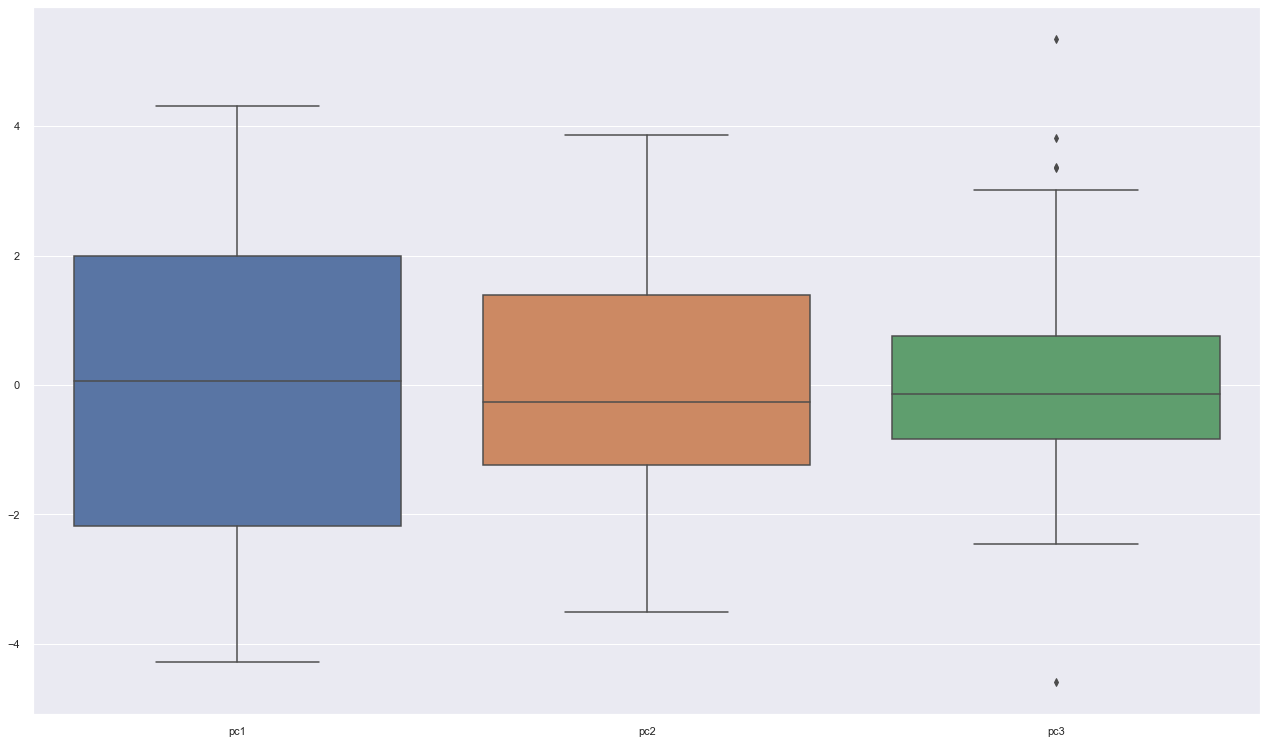

In [31]:
dff = pd.DataFrame(data_pca_3,columns=['pc1','pc2','pc3'])
sns.boxplot(data=dff)